In [3]:
import os
import sys

cwd0 = './config/'
sys.path.append(cwd0)

import visualID as vID
from visualID import color
vID.init(cwd0)

**Début à:** Friday 26 May 2023, 08:08:25  
**Hostname:** sw-chim-aruba-01.insa-toulouse.fr (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/logoDebut.svg" style="margin-left:auto; margin-right:auto"/></p>

# Traitement statistique de données<br>(data science pour débutants)<br><br>Statistical treatment of data<br>(data science for beginners)*

## Statistiques et régression<br>*Statistics and regression*

### Régression linéaire<br>*linear regression*

<div class="intro">

En statistiques, en économétrie et en apprentissage automatique (machine learning), un modèle de régression linéaire est un **modèle** qui cherche à établir une relation linéaire entre une variable <i>y</i> et une  variable <i>x</i> qui sont toutes deux tirées d'observations. L'incertitude sur ces observations entraîne que le tracé de la variable <i>y</i> en fonction de <i>x</i> s'apparente le plus souvent à un nuage de points, comme sur la figure ci-dessous.

Dans le cadre d'un modèle linéaire simple, **l'optimisation de ce modèle** permet de déterminer :
- la droite de régression, qui est la droite qui **passe au plus près de l'ensemble des points** (représentée en rouge sur la figure ci-dessous)
- les paramètres *a* et *b* de la droite d'équation $\hat{y}=ax+b$. *a* est le coefficient directeur (la pente) et *b* est l'ordonnée à l'origine
- l'incertitude sur chacun de ces paramètres
- le coefficient de détermination *R<sup>2</sup>*, qui est une mesure de la qualité de la régression linéaire
<p style="text-align: center"><img width="600px" src="DS4B-svg/fct1.png" style="margin-left:auto; margin-right:auto" id="img_fct1"/></p>
</div>
<div class="introE">

In statistics, econometrics and machine learning, a linear regression model is a **model** that aims at establishing a linear relationship between a variable <i>y</i> and a variable <i>x</i>, both of which are derived from observations. The uncertainty about these observations means that the plot of the variable <i>y</i> as a function of <i>x</i> most often looks like a scatter plot, as in the figure above.
    
In the context of a simple linear model, **the optimization of this model** allows to determine:

- the regression line, which is the line that passes closest to the set of points (shown in red in the figure above)
- the parameters *a* and *b* of the line with equation $\hat{y}=ax+b$. *a* is the slope (or gradient) and b is the *y*-intercept
- the uncertainty on each of these parameters
- the coefficient of determination *R<sup>2</sup>*, which is a measure of the accuracy of the linear regression
</div>
<br>
<div class=rq>
<b>Pourquoi un chapeau sur $\hat{y}$ ?</b> <br>
Car l'expression $\hat{y}=ax+b$ va permettre de faire une <b>prédiction</b> de la variable $y$ pour n'importe quelle valeur de $x$, pas seulement pour celles qui sont représentées sous forme de nuage de points et qui ont servi à déterminer $a$ et $b$
</div>
<div class=rqE>
<b>Why a hat on $\hat{y}$?</b> <br>
Because the expression $\hat{y}=ax+b$ will allow the <b>prediction</b> of the $y$ variable for any $x$ value, not just for those represented as a scatterplot and that have been used to fit $a$ and $b$
</div>

#### Chargement des bibliothèques utiles<br>*importation of the usueful libraries*

<div class="intro">

On va importer dans notre environnement de travail :
- `pylab`, très utile pour de la programmation scientifique avec python
- `pandas`, qui permet de lire des tableaux au format excel ou csv, et de les manipuler en tant que "dataframes"
- `numpy`, destinée à manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux
- `linregress`, qui fait partie de la bibliothèque statistique `scipy`
    
</div>
<div class="introE">

We are going to import in our working environment :

- `pylab`, very useful for scientific programming with python
- `pandas`, which allows to read tables in excel or csv format, and to work on them as dataframes
- `numpy,` to manipulate matrices or multidimensional arrays and mathematical functions operating on these arrays
- `linregress`, which is part of the `scipy` statistical library
    
</div>

In [4]:
%matplotlib inline
from pylab import *
import pandas as pd
import numpy as np
from scipy.stats import linregress

<div class=rq>
    
<b>Attention !</b> <br>
La bibliothèque `SciPy` utilise les tableaux et matrices au format `NumPy`. <br>
Il faudra donc convertir tout tableau au format `pandas` en tableau au format `NumPy`
</div>
<div class=rqE>
    
<b>Attention !</b> <br>
The `SciPy` library uses arrays and matrices in `NumPy` format. <br>
You will have to convert any `pandas` dataframe into an array in `NumPy` format
</div>

#### Visualisation des données<br>*Data visualization*

<div class="intro">

Dans les lignes de code ci-dessous :
- on charge la base de données iris, qui va être stockée au format pandas dans le dataframe `dfi`
- on trace la longueur des pétales (`petal_length`) en fonction de leur largeur (`petal_width`)
- on a arbitrairement choisi d'assigner la longueur des pétales à $y$ et la largeur à $x$ 
</div>

<div class="introE">

In the lines of code below :

- we load the iris database, which will be stored in pandas format in the `dfi` dataframe
- we plot the length of the petals (`petal_length`) according to their width (`petal_width`)
- we arbitrarily chose to assign the petal length to $𝑦$ and the width to $𝑥$
</div>

<Axes: xlabel='petal_width', ylabel='petal_length'>

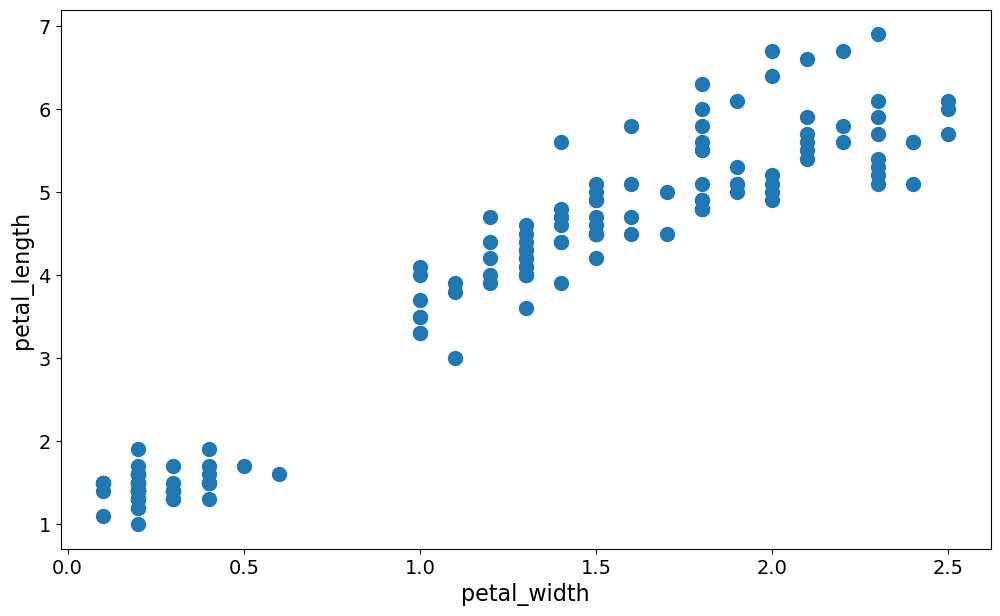

In [5]:
dfi=pd.read_csv('./DS4B-iris-data/iris.csv', sep=";")
plt.rcParams["figure.figsize"] = (12,7) #on ajuste la taille du graphique
plt.rcParams["font.size"] = (16) #on ajuste la taille des caractères
dfi.plot(x="petal_width", y="petal_length", kind='scatter', marker='o',s=100, fontsize=14)

<div class="rq">
    Il semble bien, <i>de visu</i>, qu'il y ait une relation linéaire entre longueur et largeur des pétales
</div>

<div class="rqE">
    Visually, there seems to be a linear relationship between the length and width of the petals
</div>

#### Utilisation de la fonction `linregress` (module `SciPy`)<br>Fit with the `linregress` function(`SciPy` library)
<div class="intro">
    
Comme prévu, on convertit les variables au format `pandas` en variables au format `NumPy`. <br>
On utilise pour cela la fonction <code>to_numpy()</code>
- la largeur de pétales des 150 échantillons est stockée dans une variable `pw` (comme petal width)
- leur longueur est stockée dans une variable `pl` (pour petal length)

</div>
<div class="introE">
    
As planned, we convert the variables in `pandas` format into variables in `NumPy` format.<br>
We use the function `to_numpy()` for this purpose

- the petal width of the 150 samples is stored in a variable `pw` (for petal width)
- their length is stored in a variable `pl` (for petal length)
</div>


In [6]:
pw=dfi["petal_width"].to_numpy()
pl=dfi["petal_length"].to_numpy()
print("petal width au format numpy")
display(pw)
print("petal length au format numpy")
display(pl)

petal width au format numpy


array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

petal length au format numpy


array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

<div class="rq">
Ça ressemble bien à un tableau au format `NumPy`</div>
<div class="rqE">
It looks like a `NumPy` table</div>

<div class="intro">

On peut maintenant appeler la fonction `linregress`.<br>
Elle va renvoyer la pente (`slope`), l'ordonnée à l'origine (`intercept`), l'erreur sur la pente (`stderr`), l'erreur sur l'ordonnée à l'origine (`intercept_stderr`), le coefficient de corrélation (`rvalue`).
    
- on appelle `linregress` et on sauve le résultat dans une variable `fit`
- puis on va récupérer les paramètres de la droite et la précision de l'optimisation ("du fit")
- enfin on affiche les paramètres (ne vous laissez pas impressionner par l'affichage formatté, pour un rendu plus propre)
</div>
<div class="introE">
    
We can now call the `linregress` function.
It will return the `slope`, the `intercept`, the error on the slope (`stderr`), the error on the intercept (`intercept_stderr`), the correlation coefficient (`rvalue`).

- we call `linregress` and save the result in a `fit` variable
- then we extract the parameters of the line and the accuracy of the optimization ("of the fit")
- finally we display the parameters (don't let yourself be impressed by the formatted display, whose interest is a cleaner rendering)
</div>
<br>
<div class="rq">

<b>Remarque</b>. Dans le cas de la régression linéaire, le **coefficient de détermination** $R^2$ ("R-carré") est le carré du coefficient de corrélation $R$.

</div>
<div class="rqE">

<b>Comment</b>. In the linear regression case, the **determination coefficient** $R^2$ ("R squared") is simply the square of the sample correlation coefficient $R$.

</div>

In [9]:
fit = linregress(x=pw, y=pl)

a = fit.slope
b = fit.intercept
r = fit.rvalue
stderr = fit.stderr
istderr = fit.intercept_stderr

print(f"a   = {a:8.3f}\nb   = {b:8.3f}\nR^2 = {r**2:6.3f}")
print(f"Erreur standard sur la valeur de la pente ={stderr:8.3f}\nErreur standard sur la valeur de l'ordonnée à l'origine ={istderr:8.3f}")

a   =    2.226
b   =    1.091
R^2 =  0.927
Erreur standard sur la valeur de la pente =   0.051
Erreur standard sur la valeur de l'ordonnée à l'origine =   0.073


<div class="rq">
    
On n'est pas obligé de formatter la sortie. Voici des instructions `print()` basiques
</div>
<div class="rqE">
    
You don't have to format the output. Here are some basic `print()` instructions
</div>

In [10]:
print("a=",a)
print("b=",b)
print("R2=",r**2)
print("erreur pente=",stderr)
print("erreur OO=",istderr)

a= 2.2258853065539115
b= 1.0905721458773772
R2= 0.9269012279220042
erreur pente= 0.05138190916478042
erreur OO= 0.07294301009148557


<div class="rq">
Mais... c'est peu lisible, et on n'a pas besoin d'autant de chiffres significatifs d'où, <i>in fine</i>, l'intérêt de formatter la sortie</div>

<div class="rqE">
But... it's not very readable, and we don't need so many significant numbers, hence the interest of formatting the output</div>

#### Représentation graphique des résultats<br>*Graphical representation of results*
<div class="intro">

On va utiliser la fonction `plot()`. 

On veut à la fois :
- tracer les valeurs $y$ en fonction de $x$
- vérifier que la régression linéaire semble juste, c'est-à-dire que la droite d'équation $\hat{y}=ax+b$ passe bien au plus près de l'ensemble des points 

Dans les lignes de code python ci-dessous :
- on définit la fonction `y_hat` (y chapeau...) qui va renvoyer $ax+b$ pour toute valeur de $x$ ($a$, $b$, $x$ sont passés en paramètre de `y_hat`)
- on appelle `plot` deux fois
    - pour tracer le nuage de points ($x$,$y$)
    - pour tracer la droite `y_hat`
</div>
<div class="introE">

We will use the `plot()` function.

We want to both:
- plot the $y$ values as a function of $x$
- check that the linear regression looks right, *i.e.*, that the line with equation $\hat{y}=ax+b$ passes as close as possible to the set of points

In the python code below:
- we define the function `y_hat` which will return $ax+b$ for any $x$ value ($a$, $b$, $x$ are parameters of `y_hat`)
- `plot` is called twice
    - to get an ($x$,$y$) scatter plot
    - to superpose the `y_hat` line
</div>

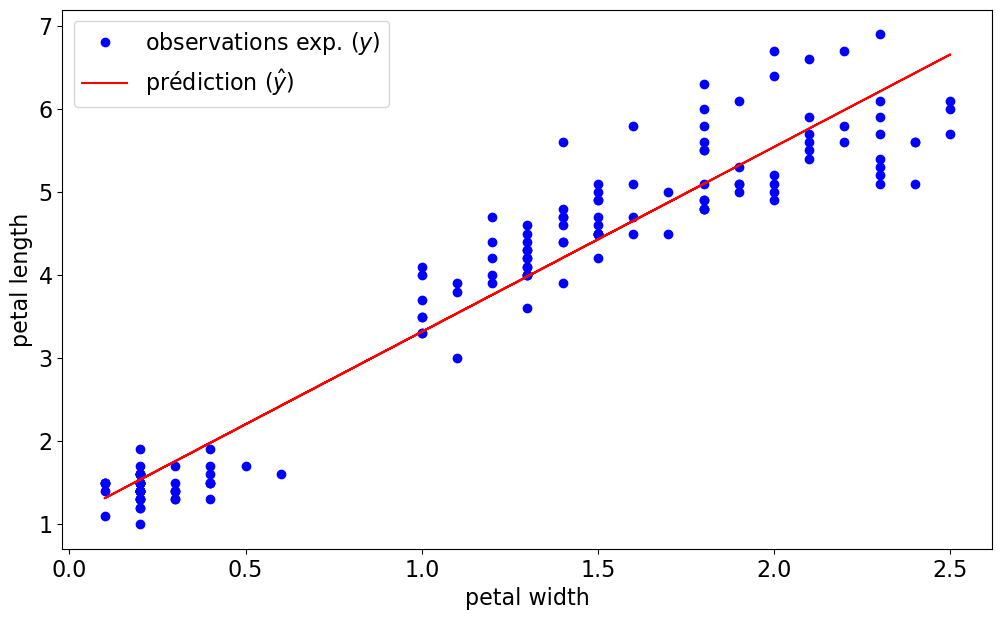

In [11]:
def pl_hat(a,b,x):
    return a * x + b

plot(pw, pl,linestyle='', marker='o', color='blue', label='observations exp. ($y$)')
plot(pw,pl_hat(a,b,pw),color='red',label='prédiction ($\hat{y}$)')
xlabel("petal width") # label de l'axe des abscisses
ylabel("petal length") # label de l'axe des ordonnées
plt.legend() #affichage de la légende sur le graphe

<div class="rq">
    <b>En résumé :</b>
<li> le coefficient de détermination $R^2$ est proche de 1
<li> les erreurs sur l'OO et sur la pente sont faibles
<li> les points expérimentaux ont l'air bien répartis de part et d'autre de la droite
<br><b> Il est donc plutôt convaincant que la largeur et la longueur des pétales soient reliées par une relation linéaire</b>
</div>

<div class="rqE">
<b>In summary:</b>
<li> the coefficient of determination R^2$ is close to 1
<li> the errors on the y-intercept and on the slope are small
<li> the experimental points look well distributed on both sides of the line
<br><b> Thus, it is rather convincing that petal width and length are related by a linear relationship</b>
</div>

#### Validité du modèle linéaire : erreurs moyennes et résidus<br>*Validity of the linear model: average errors and residuals*

<div class="intro">

En statistiques, l'erreur moyenne absolue (en anglais <b>MAE</b> = Mean Absolute Error) est calculée à partir de la différence entre les valeurs observées, $y(x_i)$, et les valeurs prédites par un modèle de régression, $\hat{y}(x_i)$. La MAE est la moyenne arithmétique des erreurs calculées pour chacun des points $x_i$ qui a servi à optimiser le modèle de régression.

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|y(x_{i}-\hat{y}(x_{i})\right|$$

On trouve souvent une autre mesure d'erreur, l'erreur quadratique moyenne (en anglais **MSE** = Mean Squared Error), qui se calcule aussi à partir de $y(x_i)$ et $\hat{y}(x_i)$ :

$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left[y(x_{i}-\hat{y}(x_{i})\right]^{2}$$

La bibliothèque `scikit-learn` fournit deux utilitaires qui permettent de calculer MAE (fonction `mean_absolute_error`) ou MSE (fonction `mean_squared_error`).
</div>
<div class="introE">
    
In statistics, the Mean Absolute Error (MAE) is calculated from the difference between the observed values, $y(x_i)$, and the values predicted by a regression model, $\hat{y}(x_i)$. The MAE is the arithmetic mean of the errors calculated for each of the points $x_i$ that were used to optimize the regression model.

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|y(x_{i}-\hat{y}(x_{i})\right|$$
    
Another error measure is often found, the Mean Squared Error (MSE), which is also calculated from $y(x_i)$ and $\hat{y}(x_i)$:
    
$$\mathrm{MSE}=\frac{1}{n}\sum_{i}\left[y(x_{i}-\hat{y}(x_{i})\right]^{2}$$
    
The `scikit-learn` library provides two utilities to calculate MAE (function `mean_absolute_error`) or MSE (function `mean_squared_error`)
</div>

In [12]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
print(f"MAE = {MAE(pl,pl_hat(a,b,pw)):8.3f}\nMSE ={MSE(pl,pl_hat(a,b,pw)):8.3f}")

MAE =    0.368
MSE =   0.226


<div class="intro">

Les <b>résidus</b> sont définis comme étant les différences entre les valeurs observées et les valeurs prédites par un modèle de régression :

$$e(x_i)=y(x_i)-\hat{y}(x_i)$$

Les résidus $e(x_i)$ sont calculés pour chacun des points $x_i$ qui a servi à déterminer le modèle de régression. 

La MAE n'est rien d'autre que la moyenne des résidus :

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|e(x_{i})\right|$$

L’analyse des résidus a pour objectif de tester la validité d’un modèle de régression. Il s’agit de vérifier graphiquement qu'ils ne présentent aucune structure particulière, c'est-à-dire qu'ils sont distribués irrégulièrement autour de 0. C'est une appréciation “subjective”, mais qui renseigne précisément sur la validité des hypothèses implicites, dont la forme de la fonction choisie. 

Dans la portion de code ci-dessous :
- on va d'abord définir une fonctions `residus` ($y(x_i)-\hat{y}(x_i)$)
- puis on va reporter sur un graphe de type nuage de points les résidus calculés pour chaque largeur de pétale (*i.e.* les $x_i$)
- on va enfin tracer un histogramme, c'est-à-dire la distribution des résidus auour de 0 (0 étant une prédiction parfaite de la fonction $\hat{y}$)
- on va pouvoir ainsi analyser graphiquement la validité de la corrélation linéaire entre largeur et longueur des pétales d'iris

</div>
<div class="introE">

**Residual** are the difference between the observed values of the quantity of interest and the values estimated by a regression model:

$$e(x_i)=y(x_i)-\hat{y}(x_i)$$

The residuals $e(x_i)$ are calculated for each of the $x_i$ points that were used to determine the regression model.

The MAE is nothing more than the average of the residues:

$$\mathrm{MAE}=\frac{1}{n}\sum_{i}\left|e(x_{i})\right|$$

The purpose of residual analysis is to test the validity of a regression model. It is a matter of verifying graphically that the residuals have no particular structure, i.e. that they are irregularly distributed around 0. This is a "subjective" assessment, but it provides precise information on the appropriateness of the hypotheses, including the form of the chosen function.

In the code section below :

- we will first define a `residus` function ($y(x_i)-\hat{y}(x_i)$)
- then we plot on a scatter plot the residues computed for each petal width (*i.e.* the $x_i$)
- we will finally plot a histogram, *i.e.* the distribution of the residuals around 0 (0 being an exact prediction of the function $\hat{y}$)
- we will be able to analyze graphically the validity of the linear correlation between width and length of the iris petals
</div>

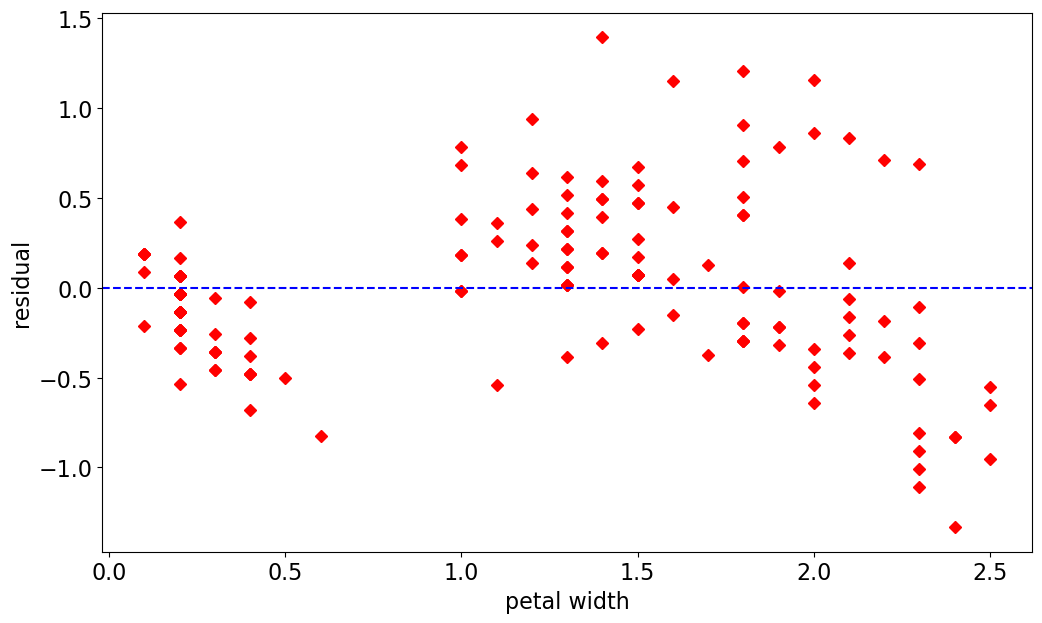

(array([ 1.,  0.,  3.,  0.,  0.,  3.,  3.,  5.,  3.,  5.,  7.,  6.,  5.,
        13., 14., 14., 11., 13.,  9., 11.,  8.,  4.,  3.,  0.,  4.,  2.,
         1.,  1.,  0.,  1.]),
 array([-1.39318842, -1.30232558, -1.21146274, -1.12059989, -1.02973705,
        -0.93887421, -0.84801136, -0.75714852, -0.66628568, -0.57542283,
        -0.48455999, -0.39369715, -0.3028343 , -0.21197146, -0.12110862,
        -0.03024577,  0.06061707,  0.15147992,  0.24234276,  0.3332056 ,
         0.42406845,  0.51493129,  0.60579413,  0.69665698,  0.78751982,
         0.87838266,  0.96924551,  1.06010835,  1.15097119,  1.24183404,
         1.33269688]),
 <BarContainer object of 30 artists>)

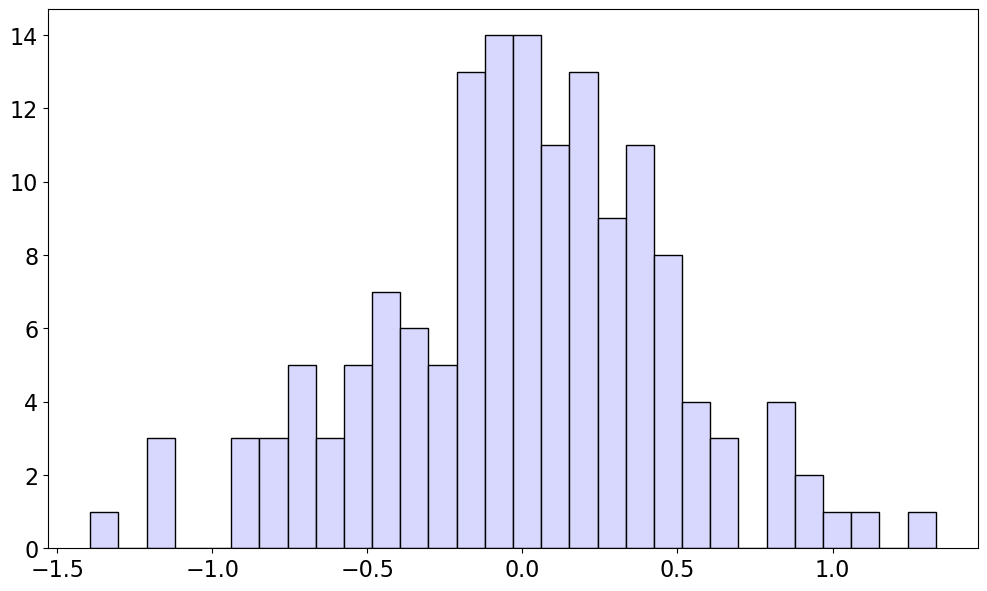

In [13]:
def residus(y,y_hat):
    return y-y_hat

plot(pw,residus(pl,pl_hat(a,b,pw)), linestyle='', marker="D", color='red')
axhline(y = 0, color = 'b',linestyle='--')
xlabel("petal width")
ylabel("residual")
show()

hist(residus(pl_hat(a,b,pw),pl), 30, cumulative=False,label='Training set',color='#d8d8ff', edgecolor='black',align='mid')

<div class="rq">
    
- Le premier graphique semble montrer une distribution aléatoire de la différence entre prédiction et valeur observée
- L'histogramme montre une distribution "en cloche" (c'est-à-dire gaussienne) des résidus, ce qui confirme qu'il semble y avoir une relation linéaire entre largeur et longueur de pétale

</div>
<div class="rqE">

- The first graph seems to show a random distribution of the difference between prediction and observed value
- The histogram shows a "bell-shaped" (i.e. gaussian) distribution of the residuals, which confirms that there seems to be a linear relationship between petal width and length
    
</div>

<div class="ex">

<b> La partie ci-dessous est optionnelle.</b>
L'objectif de cette partie est de tracer le nuage de points et l'histogramme à l'aide du module <code>seaborn</code>, qui permet :
- de tracer une représentation graphique de meilleure qualité
- de tracer l'histogramme des résidus par catégorie d'iris

    
On va en outre tracer les histogrammes en parallèle du nuage de points, c'est-à-dire avec la même échelle des ordonnées
</div>
<div class="exE">
    
<b>The section below is optional.</b>
The goal of this part is to plot the scatter plot and the histogram using the `seaborn module`, which allows :
- to plot a better quality graphic representation
- to plot the histogram of the residuals by iris category

We will also plot the histograms next to the scatterplot, *i.e.* with the same y-axis scale
</div>

(-2.0, 2.0)

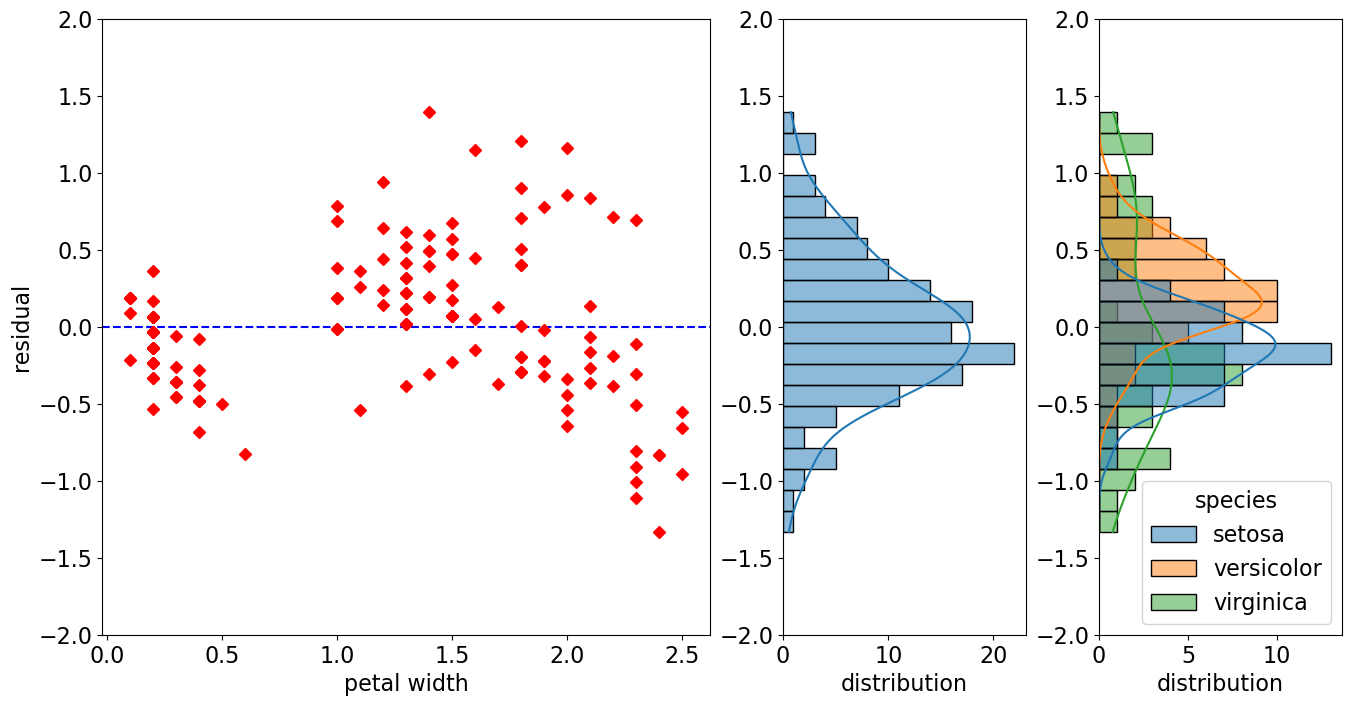

In [14]:
import seaborn as sns
from matplotlib import gridspec
def residus(y_hat,y):
    return y-y_hat
species=dfi["species"]
nbins=20
limit=2
plt.rcParams["figure.figsize"] = (16,8) #on ajuste la taille du graphique
gs = gridspec.GridSpec(1, 3, width_ratios=[2.5, 1, 1])
plt.subplot(gs[0])
axhline(y = 0, color = 'b',linestyle='--')
plt.plot(pw,residus(pl_hat(a,b,pw),pl), linestyle='', marker="D", color='red')
xlabel("petal width")
ylabel("residual")
plt.ylim(-limit,limit)
plt.subplot(gs[1])
xlabel("petal width")
xlabel("distribution")
sns.histplot(y=residus(pl_hat(a,b,pw),pl),bins=nbins,kde=True)
plt.ylim(-limit,limit)
plt.subplot(gs[2])
xlabel("distribution")
sns.histplot(y=residus(pl_hat(a,b,pw),pl),bins=nbins,hue=species,kde=True)
plt.ylim(-limit,limit)

<div class="rq">

- C'est esthétiquement plus stylé
- On visualise mieux la distribution gaussienne de l'erreur globale (premier histogramme)
- On voit sur l'histogramme de droite que la distribution de l'erreur pour l'espèce *virginica* s'éloigne d'une courbe "en cloche". Par manque de données ?
</div>

<div class="rqE">
    
- It is aesthetically more elegant
- We can better visualize the gaussian distribution of the global error (first histogram)
- We can see on the right histogram that the distribution of the error for the species *virginica* is moving away from a bell curve. Because of a lack of data?
</div>

#### Prédiction de la longueur d'un pétale d'Iris, connaissant sa largeur

<div class="ex">
Un botaniste a découvert au fond de son jardin un Iris de la famille <i>setosa</i>, dont les pétales sont de largeur 0.25 cm.
<ol>
    <li> quelle est la longueur de pétale peut-on prédire, à partir de la base de données "iris"? (indice : utilisez la fonction <code>y_hat</code>)
    <li> la longueur mesurée est en fait de 1.45 cm. Quelle est l'erreur quadratique commise par le modèle statistique ? (indice: utiliser la fonction <code>MSE()</code> importée de la bibliothèque <code>scikit-learn</code>)
</ol> 
</div>
<div class="exE">
A botanist discovered at the bottom of his garden an iris of the <i>setosa</i> family, whose petals are 0.25 cm wide.
<ol>
    <li> what is the length of the petal that can be predicted from the "iris" database? (hint: use the <code>y_hat</code> function)
    <li> the measured length is in fact 1.45 cm. What is the squared error made by the statistical model? (hint: use the <code>MSE()</code> function imported from the <code>scikit-learn</code> library)
</ol> 
</div>

In [15]:
largeur_hat=pl_hat(a,b,0.25)
print(largeur_hat)

1.647043472515855


<div class="rq">

<b>Attention !</b><br>
La documentation de la fonction `mean_squared_error` (importée en tant que `MSE`) précise que l'appel est de la forme <code>mean_squared_error(y_true, y_pred)</code>, où <code>y_true</code> et <code>y_pred</code> sont des **tableaux**. </div>

<div class="rqE">

<b>Attention!</b><br>
The documentation for the `mean_squared_error` function (imported above as `MSE`) states that the call is of the form `mean_squared_error(y_true, y_pred)`, where `y_true` and `y_pred` are **arrays**.</div>

In [16]:
print(MSE([1.45],[largeur_hat]))

0.038826130061106495


### Régression polynomiale avec la fonction `polyfit()` de `numpy`<br>*Polynomial regression with the `polyfit()` function of `numpy`*

#### Rappel : allure de fonctions polynomiales simples<br>*Reminder : shape of simple polynomial functions*

<div class="intro">

On va d'abord tracer les fonctions polynomiales d'ordre 1 à 6, en tant que rappel de cours. Pour mieux organiser la sortie, on va exploiter la fonction `subplot_mosaic()` de `matplotlib` (cf Thème "*tracé de fonctions*")
</div>
<div class="introE">

We will first plot the *n*th order polynomial functions (*n*=1-6), as a refresher course. To better organize the output, we will use the `subplot_mosaic()` function of `matplotlib` (see Theme "plotting functions")</div>

In [ ]:
mosaic = [[1,2,3],
         [4,5,6]]
fig, ax = subplot_mosaic(mosaic, constrained_layout=True,figsize=(10,6),sharex=True,sharey=False)

xmin = -2
xmax = 2
npt = 100
# génération de n points équirépartis entre xmin et xmax
x = np.linspace(xmin, xmax, npt)

ax[1].set_xlim(xmin,xmax)
ax[1].plot(x, x,color='red')
ax[1].set_title("$f(x)=x$", fontsize=14, color="blue")
ax[1].axvline(x = 0, color = '0.7',linestyle='--')
ax[1].axhline(y = 0, color = '0.7',linestyle='--')

ax[2].plot(x, x**2,color='red')
ax[2].set_title("$f(x)=x^2$", fontsize=14, color="blue")
ax[2].axvline(x = 0, color = '0.7',linestyle='--')
ax[2].axhline(y = 0, color = '0.7',linestyle='--')

ax[3].plot(x, x**3,color='red')
ax[3].set_title("$f(x)=x^3$", fontsize=14, color="blue")
ax[3].axvline(x = 0, color = '0.7',linestyle='--')
ax[3].axhline(y = 0, color = '0.7',linestyle='--')

ax[4].plot(x, x**4,color='red')
ax[4].set_title("$f(x)=x^4$", fontsize=14, color="blue")
ax[4].axvline(x = 0, color = '0.7',linestyle='--')
ax[4].axhline(y = 0, color = '0.7',linestyle='--')

ax[5].plot(x, x**5,color='red')
ax[5].set_title("$f(x)=x^5$", fontsize=14, color="blue")
ax[5].axvline(x = 0, color = '0.7',linestyle='--')
ax[5].axhline(y = 0, color = '0.7',linestyle='--')

ax[6].plot(x, x**6,color='red')
ax[6].set_title("$f(x)=x^6$", fontsize=14, color="blue")
ax[6].axvline(x = 0, color = '0.7',linestyle='--')
ax[6].axhline(y = 0, color = '0.7',linestyle='--')

#### Lecture d'un polynôme & régression<br>*Reading of a polynomial & regression*

<div class="intro">

On commence par lire un fichier csv, qui est constitué de 2 colonnes de données (X, puis Y) séparées par une tabulation (`delimiter='\t'`). On trace ensuite Y en fonction de X

</div>

<div class="introE">
    
We start by reading a csv file, which consists of 2 columns of data (X, then Y) separated by a tab (`delimiter='\t'`). Then we plot Y according to X

</div>

In [ ]:
X, Y = np.loadtxt('DS4B-iris-data/fpol.csv', delimiter='\t', unpack=True) #if unpack is True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...)
plt.rcParams["figure.figsize"] = (10,6) #on ajuste la taille du graphique
plt.plot(X, Y,linestyle='', marker='o', label="experimental data")
legend()

<div class="rq">
La fonction ressemble à un polynôme d'ordre impair.
<li>Essayons d'abord un <i>fit</i> des données par un polynôme d'ordre 3, c'est-à-dire du type $ax^3+bx^2+cx+d$
<li>Puis on va afficher les paramètres du polynôme
<li>Enfin, on va tracer les données et le polynôme optimoisé sur un même graphe 
</div>

<div class="rqE">
The function looks like an odd-order polynomial.
<li>Let's first try to fit the data by a 3rd-order polynomial, <i>i.e.</i> of the type $ax^3+bx^2+cx+d$
<li>Then we will display the parameters of the polynomial
<li>Finally, we will plot the data and the fitted polynomial on the same graph
</div>

In [ ]:
# la routine polyfit est appelée avec les tableaux X & Y, ainsi que l'ordre du polynôme modèle.
# Elle va renvoyer les coefficients a, b, c, & d du polynôme, stockés dans la liste PFit3
# the polyfit routine is called with the X & Y arrays, and the order of the model polynomial.
# It will return the coefficients a, b, c, & d of the polynomial, stored in the PFit3 list
PFit3 = np.polyfit(X, Y, 3)

# affichage des paramètres du polynôme
# print the parameters of the 3rd-order polynomial
print(PFit3)
# affichage formaté des paramètres
# formatted print of the parameters
print(f"{PFit3[0]:6.2f}x^3 + {PFit3[1]:6.2f}x^2 + {PFit3[2]:6.2f}x + {PFit3[3]:6.2f}")

# inutile de faire des copier/coller des valeurs de a, b, c, d. On va utiliser directement poly1d, en lui passant PFit3 en paramètre
# poly1d fait partie de NumPy. Par exemple, poly1d (3, 2, 6) renvoie 3x^2 + 2x + 6.
# no need to copy/paste the values of a, b, c, d. We will use poly1d directly, passing PFit3 as a parameter
# poly1d is part of NumPy. For example, poly1d (3, 2, 6) returns 3x^2 + 2x + 6.
P_hat3  = np.poly1d(PFit3)
print(P_hat3)

# tracé des points et du polynôme
# scatter plot and curve plot of the optimized polynomial
plt.plot(X, Y,linestyle='', marker='o', label="observed data")
plt.plot(X, P_hat3(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()

<div class="rq">
On constate une très bonne superposition. On va maintenant calculer les erreurs moyennes (MAE et MSE)</div>
<div class="rqE">
We can see a very good superposition. We will now calculate the average errors (MAE and MSE)</div>

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
print(f"MSE = {MSE(Y,P_hat3(X)):8.3f}\nMAE ={MAE(Y,P_hat3(X)):8.3f}")

<div class="rq">
Se pourrait-il qu'un polynôme d'ordre 5 permette un meilleur fit ? On va mettre en &oelig;uvre toute la procédure en finissant par le calcul des erreurs</div>
<div class="rqE">
Could it be that a polynomial of order 5 allows a better fit? We are going to implement the whole procedure by finishing with the calculation of the errors</div>

In [ ]:
PFit5 = np.polyfit(X, Y, 5)
P_hat5  = np.poly1d(PFit5)
print(P_hat5)
plt.plot(X, Y,linestyle='', marker='o', label="observed data")
plt.plot(X, P_hat5(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()
print(f"MSE = {MSE(Y,P_hat5(X)):8.3f}\nMAE ={MAE(Y,P_hat5(X)):8.3f}")

<div class="rq">
    Compte tenu des faibles coefficients associés aux ordres élevés ($x^5$ et $x^4$) il s'agit bien d'une fonction polynomiale d'ordre 3. La légère diminution de la MAE et de la MSE montre que l'introduction des ordres 4 et 5 permet de diminuer légèrement l'écart entre fonction prédite et fonction réelle.<span style="color:red;"><b> Mais ça n'est pas forcément une bonne chose (</b>cf paragraphe "surapprentissage").</span><br> <br>
    En fait, la fonction tracée a été générée en "bruitant" le polynôme $4x^3+2x^2-3x-6$.<br>
    La comparaison avec les coefficients polynomiaux issus du fit montre qu'il vaut donc mieux chercher à fitter les données avec l'ordre polynomial le plus approprié, même si en apparrence on réduit l'erreur.
</div>
<div class="rqE">
    Given the low coefficients associated with the high orders ($x^5$ and $x^4$) it is indeed a 3rd-order polynomial. The slight decrease of the MAE and the MSE shows that the introduction of orders 4 and 5 allows to slightly decrease the gap between predicted and real values. <span style="color:red;"><b>But this is not necessarily a good thing</b> (see "overfitting" section)</span><br> <br>
    In fact, the plotted function was generated by adding noise to the polynomial $4x^3+2x^2-3x-6$.<br>
    The comparison with the polynomial coefficients resulting from the fit shows that it is therefore better to try to fit the data with the most appropriate polynomial order, even if it appears to reduce the error.
</div>

In [ ]:
print(f"{color.BOLD}{color.RED}Pour mémoire :{color.OFF}")
print("Polynôme d'ordre 3 :")
print(P_hat3)
print(f"Polynôme d'ordre 5 :")
print(P_hat5)

<div class="rq">
    <b> Pourquoi ne retrouve-t-on pas exactement l'équation $4x^3+2x^2-3x-6$ ?</b><br>
        À cause du bruit ajouté à la fonction.<br><br>
    <b>Remarque. </b>On a introduit un bruit = 30. Un commentaire ? (<i>Suggestion: regarder la MAE...</i>)
</div>
<div class="rqE">
    <b> Why is the equation $4x^3+2x^2-3x-6$  not accurately found?</b><br>
        Because of the noise added to the function..<br><br>
    <b>Comment. </b>The added noise = 30. Any comment ? (<i>Suggestion: look at the MAE...</i>)
</div>

#### Surapprentissage<br>*overfitting*

<div class="intro">

On va reprendre le même jeu de données, mais on va essayer de réduire l'erreur, en considérant un ordre très élevé: 31!
</div>
<div class="introE">
    
We will use the same data set, but we will try to reduce the error, by considering a very high order: 31!
</div>

In [ ]:
PFit31 = np.polyfit(X, Y, 31)
P_hat31  = np.poly1d(PFit31)
print(P_hat31)
plt.plot(X, Y,linestyle='', marker='o', label="observed data")
plt.plot(X, P_hat31(X),'-', marker='', color='r', linewidth=2, label="$\hat{P}$")
legend()
print(f"MSE = {MSE(Y,P_hat31(X)):8.3f}\nMAE ={MAE(Y,P_hat31(X)):8.3f}")

<div class="rq">
    L'écart entre points expérimentaux et fonction polynomiale a beaucoup diminué (cf MAE & MSE). L'augmentation de l'ordre permet de passer au plus près d'un grand nombre de points. <br>
    Lorsqu'on examine les valeurs des coefficients on s'aperçoit qu'on s'éloigne beaucoup de la loi réelle  ($4x^3+2x^2-3x-6$) qui relie $x$ et $y$. Les coefficient associés à $x^3$, $x^2$ et $x$ sont même totalement farfelus !<br>
    Dans le contexte de la <b>science des données et de l'apprentissage automatique</b>, on parlerait de <span style="color:red"><b>surapprentissage</b></span> (overfitting) : le modèle polynomial sait reproduire beaucoup de détails, mais <b>il est passé à côté du phénomène global</b>, décrit ici par l'équation $4x^3+2x^2-3x-6$.
</div>
<div class="rqE">
    The gap between the experimental points and the polynomial function has decreased a lot (cf MAE & MSE). The increase of the order allows us to get closer to a large number of points. <br>
When we examine the values of the coefficients we see that we are far from the real law ($4x^3+2x^2-3x-6$) which links $x$ and $y$. The coefficients associated to $x^3$, $x^2$ and $x$ are even totally crazy ! <br>

In the context of <b>data science and machine learning</b>, this would be named <span style="color:red"><b>overfitting</b></span>: the polynomial model is able to reproduce a lot of details, but <b>it has missed the global phenomenon</b>, described here by the equation $4x^3+2x^2-3x-6$.
</div>

### Régression avec la bibliothèque `SciPy`<br>*Regression with the `SciPy` library*

<div class="intro">

La fonction `curve_fit` du module `scipy` présente l'intérêt de pouvoir établir des corrélations plus complexes que des fonctions affines ou polynomiales.

L'utilisation de `curve_fit` nécessite deux étapes :

- définir la relation mathématique à modéliser sous forme d'une fonction python `f(x,a,b,c...)` qui prend comme arguments la valeur en abscisse `x`, puis les coefficients `(a,b,c...)` du modèle à déterminer

- utiliser la fonction `curve_fit` avec comme arguments la fonction python `f`, les données `x` et les données `y`
</div>
<div class="introE">

The `curve_fit` function of the `scipy` library has the advantage of being able to establish more complex correlations than linear or polynomial functions.

Using `curve_fit` requires two steps:

- define the mathematical relationship to be modeled in the form of a python function `f(x,a,b,c...)` which takes as arguments the `x`, then the coefficients `(a,b,c...)` of the model to be determined 

- use the `curve_fit` function with as arguments the python function `f`, the array `x` and the associated array `y`
</div>

#### Appel des bibliothèques<br>*Importation of the libraries*

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

#### Mise en &oelig;uvre du fit<br>*Fitting process*

In [ ]:
def P3(x,a,b,c,d):
    P =  a*x**3 + b*x**2 + c*x + d
    return P

X, Y = np.loadtxt('DS4B-iris-data/fpol.csv', delimiter='\t', unpack=True) #if unpack is True, the returned array is transposed, so that arguments may be unpacked using x, y, z = loadtxt(...)

PFit3b, _ = curve_fit(P3, X, Y)
P_hat3b  = np.poly1d(PFit3b)
#affichage des paramètres du polynôme
print(P_hat3b)
print()
print(f"{color.BLUE}{color.BOLD}à comparer au résultat du fit avec polyfit :{color.OFF}")
print(P_hat3)

<div class="rq">
    On a utilisé deux bibliothèques différentes (<code>NumPy</code> et <code>SciPy</code>), qui heureusement donnent le même résultat.<br>
    <li> <code>polyfit</code> est plus facile à utiliser pour une régression polynomiale
    <li> <code>curve_fit</code> est beaucoup plus général, puisqu'on peut fitter n'importe quelle fonction mathématique, pas uniquement des polynômes
</div>
<div class="rqE">
We used two different libraries (<code>NumPy</code> and <code>SciPy</code>), which thankfully give the same result.
<li> <code>polyfit</code> is easier to use for polynomial regression
<li> <code>curve_fit</code> is much more general, since any mathematical function can be fitted, not only polynomials
</div>

### Bilan de la deuxième partie<br>*Review of this second part*

<div class="rq">
    
- on a pu déterminer l'équation d'une fonction mathématique qui reflète le lien entre deux ensembles de variables $(x, y)$, qui sont toutes deux tirées d'observations

- en d'autres termes, on a recherché la fonction mathématique permettant de décrire le comportement de la variable statistique $y$ en fonction d'une autre variable statistique $x$

- même s'il existe des grandeurs qui permettent d'avoir un aperçu global de la qualité de l'ajustement (MAE, MSE, $R^2$), c'est insuffisant : il faut exercer un regard critique par le tracé des résidus

- dans le cas où le "*fitting*" semble convaincant, cette fonction mathématique, $\hat{y}=f(x)$, va permettre de prédire $y$ pour une valeur de $x$ quelconque. **Attention !** Il est dans la plupart des cas dangereux d'extrapoler en dehors de l'intervalle de la variable $x$ mesurée (observée).
</div>

<div class="rqE">

- we were able to determine the equation of a mathematical function that represents the relationship between two sets of variables $(x, y)$, both of which are obtained from observations

- in other words, we looked for the mathematical function allowing to describe the behavior of the statistical variable $y$ as a function of another statistical variable $x$
 
- even if there are quantities that give an overall view of the quality of the fitting (MAE, MSE, $R^2$), this is not enough: it is necessary to exercise critical thinking, by plotting the residuals

- in the case where the fitting seems convincing, this mathematical function, $\hat{y}=f(x)$, will allow to predict $y$ for any value of $x$. **Be careful!** It is in most cases dangerous to extrapolate outside the range of the measured variable $x$
</div>

### Chapitre suivant : l'apprentissage supervisé (supervised Machine Learning) appliqué à la classification (régression logistique)<br>*Next chapter: supervised Machine Learning applied to logistic regression*

<div class="intro">
    
On attire aussi l'attention sur un point important : on s'est servi de **toutes** les observations $(x_i,y_i)$ pour déterminer l'équation de la fonction mathématique $f(x)$. Pourquoi appuyer sur ce point ? Car avec les algorithmes d'apprentissage automatique (machine learning) on ne se sert que d'une partie des données pour l'apprentissage, le reste étant utilisé pour tester la fiabilité de l'algorithme. On va voir ça dans le [chapitre suivant](./DS4B-Iris3.ipynb).


N'oubliez pas de faire d'abord [l'exercice associé à ce chapitre](./DS4B-Exercices/DS4B-Iris2-Exercice.ipynb).

</div>

<div class="introE">
    
Attention is also called to an important point: **all** observations $(x_i,y_i)$ were used to determine the equation of the mathematical function $f(x)$ . Why focus on this point? Because machine learning algorithms only use a part of the data for learning, the rest being used to test the reliability of the algorithm. We will see this in the [next chapter](./DS4B-Iris3.ipynb).

Don't forget to do the [exercise associated with this chapter](./DS4B-Exercices/DS4B-Iris2-Exercice.ipynb) first.

</div>

### Évaluation formative après la vidéo

Voir les quizz (uniquement pour les étudiants d'UT3, cf Moodle)

In [ ]:
vID.end(cwd0)